In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, ReLU,MaxPooling2D, BatchNormalization
from keras import backend as K
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
import time
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

<h1>Saving log files of training models</h1>

In [2]:
NAME = "FashionDataset-{}".format(int(time.time()))

In [3]:
tensorboard = TensorBoard(log_dir = 'logs/{}'.format(NAME))

In [4]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.333)
sess = tf.Session(config = tf.ConfigProto(gpu_options = gpu_options))

<h1>TRAINING</h1>

<h2>Loading the pickle files</h2>

In [5]:
pickle_in = open("trainX.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("trainY.pickle","rb")
y = pickle.load(pickle_in)

<h2>Splitting data into testing and training data</h2>

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_train shape:  (48000, 28, 28)
y_train shape:  (48000,)


In [8]:
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_test shape:  (12000, 28, 28)
y_test shape:  (12000,)


<h2>Loading images from training data</h2>

In [9]:
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

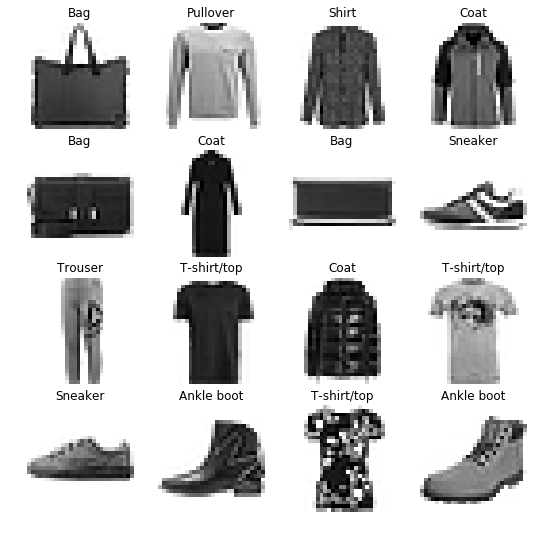

In [10]:
#Showing top 16 images of Training data

import matplotlib.pyplot as plt
i=0
fig, axes = plt.subplots(4, 4, figsize = (9,9))
for row in axes:
    for axe in row:
        img = X_train[i]
        cloths = y_train[i]
        axe.imshow(img, cmap=plt.cm.binary)
        axe.set_title(clothing[cloths])
        axe.set_axis_off()
        i += 1

<h2>Re-shaping data</h2>

In [11]:
img_rows, img_cols = 28, 28

In [12]:
X_train =X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
input_shape = (img_rows, img_cols, 1)
input_shape

(28, 28, 1)

<h2>Preparing for training</h2>

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (48000, 28, 28, 1)
X_test shape:  (12000, 28, 28, 1)


In [15]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

y_train shape:  (48000, 10)
y_test shape:  (12000, 10)


In [16]:
batch_size = 120
epochs = 20

<h2>Using Sequential model</h2>

In [18]:
X_trainSeq = np.reshape(X_train, (48000,784))
X_testSeq = np.reshape(X_test, (12000, 784))

print('X_train shape after reshape: ', X_trainSeq.shape)
print('X_test shape after reshape: ', X_testSeq.shape)

X_train shape after reshape:  (48000, 784)
X_test shape after reshape:  (12000, 784)


In [19]:
model = Sequential()
model.add(Dense(512, input_dim=784), )
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))   
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


<h3>Fitting Sequential model and evaluating the accuracy</h3>

In [20]:
SEQ = model.fit(X_trainSeq, y_train, batch_size= batch_size, epochs= epochs, validation_split=0.2)
score = model.evaluate(X_testSeq, y_test, verbose=0)
print('test loss: ', score[0])
print('accuracy: ', score[1])

Train on 38400 samples, validate on 9600 samples
Epoch 1/20
38400/38400 [==============================] - 12s 305us/step - loss: 0.6120 - acc: 0.7809 - val_loss: 0.5322 - val_acc: 0.7902
Epoch 2/20
38400/38400 [==============================] - 11s 284us/step - loss: 0.4169 - acc: 0.8453 - val_loss: 0.4045 - val_acc: 0.8549
Epoch 3/20
38400/38400 [==============================] - 11s 278us/step - loss: 0.3634 - acc: 0.8653 - val_loss: 0.3740 - val_acc: 0.8616
Epoch 4/20
38400/38400 [==============================] - 11s 277us/step - loss: 0.3347 - acc: 0.8753 - val_loss: 0.4028 - val_acc: 0.8515
Epoch 5/20
38400/38400 [==============================] - 11s 276us/step - loss: 0.3134 - acc: 0.8818 - val_loss: 0.3744 - val_acc: 0.8627
Epoch 6/20
38400/38400 [==============================] - 11s 279us/step - loss: 0.2922 - acc: 0.8907 - val_loss: 0.3491 - val_acc: 0.8728
Epoch 7/20
38400/38400 [==============================] - 11s 279us/step - loss: 0.2770 - acc: 0.8954 - val_loss: 0.3

<h2>Using CNN Model </h2>

In [26]:
CNNmodel = Sequential()
CNNmodel.add(Conv2D(12, kernel_size=(3,3), activation="relu", input_shape=(img_rows, img_cols, 1)))
CNNmodel.add(Conv2D(20, kernel_size=(3,3), activation="relu"))
CNNmodel.add(MaxPooling2D(pool_size=(2,2)))
CNNmodel.add(Dropout(0.5))
CNNmodel.add(Flatten())
CNNmodel.add(Dense(100, activation="relu"))
CNNmodel.add(Dense(10, activation="softmax"))

CNNmodel.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

<h3>Fitting CNN model and evaluating the accuracy</h3>

In [27]:
CNNmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 12)        120       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 20)        2180      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 20)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2880)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               288100    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total para

In [29]:
CNN = CNNmodel.fit(X_train, y_train, batch_size= batch_size, epochs= epochs, validation_split=0.2)

Train on 38400 samples, validate on 9600 samples
Epoch 1/20
38400/38400 [==============================] - 548s 14ms/step - loss: 0.5870 - acc: 0.7874 - val_loss: 0.4006 - val_acc: 0.8568
Epoch 2/20
38400/38400 [==============================] - 541s 14ms/step - loss: 0.3989 - acc: 0.8555 - val_loss: 0.3466 - val_acc: 0.8790
Epoch 3/20
38400/38400 [==============================] - 537s 14ms/step - loss: 0.3496 - acc: 0.8732 - val_loss: 0.3037 - val_acc: 0.8908
Epoch 4/20
38400/38400 [==============================] - 536s 14ms/step - loss: 0.3162 - acc: 0.8829 - val_loss: 0.2857 - val_acc: 0.8970
Epoch 5/20
38400/38400 [==============================] - 534s 14ms/step - loss: 0.2943 - acc: 0.8910 - val_loss: 0.2802 - val_acc: 0.8962
Epoch 6/20
38400/38400 [==============================] - 533s 14ms/step - loss: 0.2716 - acc: 0.8995 - val_loss: 0.2609 - val_acc: 0.9054
Epoch 7/20
38400/38400 [==============================] - 540s 14ms/step - loss: 0.2553 - acc: 0.9045 - val_loss: 0.2

In [31]:
score = CNNmodel.evaluate(X_test, y_test, verbose=0)
print('test loss: ', score[0])
print('accuracy: ', score[1])

test loss:  0.23249539306666703
accuracy:  0.9224166666666667


<h2>Graphical representation of accuracy, val_accuracy, loss and val_loss</h2>

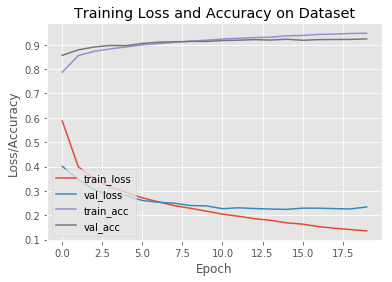

In [32]:
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), CNN.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), CNN.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), CNN.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), CNN.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plotGraph.png")

<h2>Classification report after predicting X_test</h2>

In [88]:
p = CNNmodel.predict(X_test)

In [92]:
categories = ["Top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print("A classification report...")
print(classification_report(y_test.argmax(axis=1), p.argmax(axis=1), target_names=categories))

A classification report...
              precision    recall  f1-score   support

         Top       0.86      0.90      0.88      1233
     Trouser       0.99      0.98      0.99      1264
    Pullover       0.86      0.90      0.88      1227
       Dress       0.93      0.93      0.93      1221
        Coat       0.90      0.85      0.87      1127
      Sandal       0.99      0.98      0.98      1223
       Shirt       0.78      0.78      0.78      1170
     Sneaker       0.96      0.96      0.96      1202
         Bag       0.99      0.97      0.98      1180
  Ankle boot       0.95      0.97      0.96      1153

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



<h2>Saving the models</h2>

In [36]:
CNNmodel.save('trainingModel.model')

In [55]:
model.save('SEQtrainingModel.model')

<h1>PREDICTION</h1>

<h2>loading the trained model</h2>

In [56]:
CNNmodel = keras.models.load_model("trainingModel.model")
SEQmodel = keras.models.load_model("SEQtrainingModel.model")

In [57]:
pickle_in = open("testX.pickle","rb")
X_tests = pickle.load(pickle_in)

In [58]:
X_tests.shape

(10000, 28, 28)

In [59]:
X_testing = X_tests.reshape(X_tests.shape[0],img_rows,img_cols,1)
X_testing = X_testing.astype('float32')
X_testing /= 255
print('X_testing shape', X_testing.shape)

X_testing shape (10000, 28, 28, 1)


<h2>Predicting test model on trained model</h2>

<h3>Prediction on Sequential model</h3>

In [61]:
X_tes = np.reshape(X_tests, (10000, 784))
p = SEQmodel.predict(X_tes)
p

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<h3>Prediction on CNN model</h3>

In [66]:
CNNprediction = CNNmodel.predict_classes(X_testing)

In [67]:
CNNprediction

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

<h2>Saving predictions of CNN model since it has the maximum accuracy</h2>

In [68]:
pickle_out = open("testY.pickle","wb")
pickle.dump(CNNprediction, pickle_out)
pickle_out.close()

<h1>Predicting image using testing and predicted data</h1>

In [69]:
categories = ["Top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [80]:
def predictingImg(index):
    plt.imshow(X_tests[index], cmap=plt.cm.binary)
    preds = CNNprediction[index]
    return categories[preds]

'Pullover'

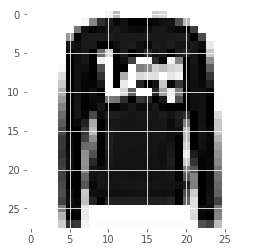

In [83]:
predictingImg(1)

'Coat'

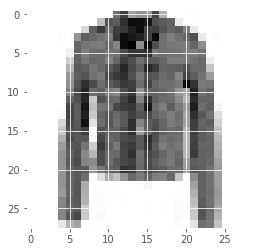

In [86]:
predictingImg(10)